In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ADsP/main/iris3.csv')

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
X = data.drop('species', axis=1)
y = data['species']

y 카테고리라서 원핫 인코딩을 해줬어야 했어.

In [16]:
y = pd.get_dummies(y)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [20]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 4 to 117
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Iris-setosa      30 non-null     uint8
 1   Iris-versicolor  30 non-null     uint8
 2   Iris-virginica   30 non-null     uint8
dtypes: uint8(3)
memory usage: 330.0 bytes


In [21]:
X_train.shape

(120, 4)

In [22]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax')) # 변수가 (타겟이) 3개기때문에 3개를 뽑는거야. 변수가 3개 이상이니까 softmax
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_data=(X_test, y_test))

Epoch 1/50
24/24 [==============================] - 1s 12ms/step - loss: 1.3123 - accuracy: 0.3333 - val_loss: 1.2429 - val_accuracy: 0.3000
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 1.1447 - accuracy: 0.3500 - val_loss: 1.1055 - val_accuracy: 0.3000
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 1.0330 - accuracy: 0.4250 - val_loss: 1.0092 - val_accuracy: 0.5000
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.9555 - accuracy: 0.6083 - val_loss: 0.9520 - val_accuracy: 0.6333
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.9057 - accuracy: 0.6667 - val_loss: 0.9007 - val_accuracy: 0.6333
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.8592 - accuracy: 0.6667 - val_loss: 0.8549 - val_accuracy: 0.6333
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.8169 - accuracy: 0.6750 - val_loss: 0.8180 - val_accuracy: 0.6333
Epoch 8/50
24/24 [=

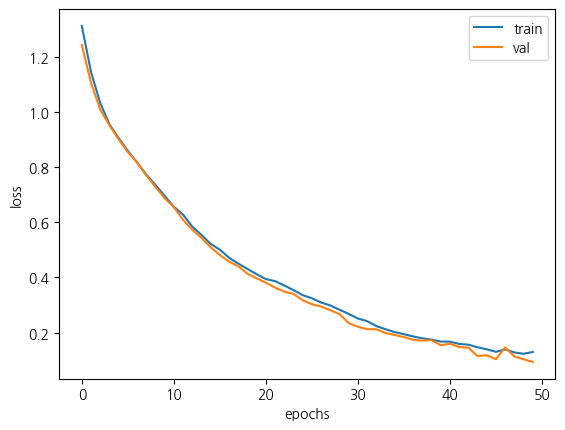

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

  val_accuracy이 1이 나오고 그래프가 내려가고있으니 좋은 모델이라고 할 수도 있는데 과적합이 의심?

초음파 광물 데이터 셋

In [35]:
data2 = pd.read_csv('https://raw.githubusercontent.com/haram4th/ADsP/main/sonar3.csv',header=None)

In [36]:
data2

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


In [38]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [39]:
data2[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

In [47]:
X2 = data2.drop(60, axis=1)
y2 = data2[60]

In [48]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=8)

In [50]:
X_train2.shape

(166, 60)

In [66]:
# 딥러닝 네트워크 생성
model2 = Sequential()
model2.add(Dense(24, input_dim=X_train2.shape[1], activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='relu'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 24)                1464      
                                                                 
 dense_13 (Dense)            (None, 10)                250       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


In [67]:
# 모델 컴파일 및 훈련
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model2.fit(X_train2, y_train2, epochs=200, batch_size=10)

Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.9888 - accuracy: 0.5542
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6024
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6468 - accuracy: 0.6928
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6319 - accuracy: 0.7108
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6175 - accuracy: 0.7108
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6058 - accuracy: 0.7229
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.7410
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5819 - accuracy: 0.7470
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.7410
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5474 - accuracy: 0.7470
Epoch 11/

Epoch 83/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 1.0000
Epoch 84/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 1.0000
Epoch 85/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 86/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 1.0000
Epoch 87/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 1.0000
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0144 - accuracy: 1.0000
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 1.0000
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0130 - accuracy: 1.0000
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0101 - accuracy: 1.0000


In [61]:
# 딥러닝 모델의 성능 검증 model, evaluate(X_test, y_test)
score = model2.evaluate(X_test2, y_test2)
print('loss: ', score[0])
print('accuracy: ', score[1])

2/2 [==============================] - 0s 0s/step - loss: 2.3365 - accuracy: 0.7619
loss:  2.336456537246704
accuracy:  0.761904776096344


In [60]:
# 모델 저장하기 model.save('저장 경로 및 파일 이름.hdf5')
model.save('./model/stone_model1.hdf5')

In [62]:
# 모델 불러오기
from tensorflow.keras.models import load_model

In [63]:
model3 = load_model('./model/stone_model1.hdf5')

In [65]:
score3 = model3.evaluate(X_test, y_test)
print('loss: ', score[0])
print('accuracy: ', score[1])

1/1 [==============================] - 0s 95ms/step - loss: 0.2756 - accuracy: 0.9667
loss:  2.336456537246704
accuracy:  0.761904776096344
